Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [43]:
import pandas as pd

a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

print('среднее арифметическое =', sum(a)/len(a))
print('смещённая оценка дисперсии =', sum((i - sum(a)/len(a))**2 for i in a)/len(a))
print('несмещённая оценка дисперсии =', sum((i - sum(a)/len(a))**2 for i in a)/(len(a) - 1))
print('среднее квадратичное отклонение =', (sum((i - sum(a)/len(a))**2 for i in a)/(len(a) - 1))**(1/2))

print(pd.Series(a).describe())



среднее арифметическое = 73.14285714285714
смещённая оценка дисперсии = 2135.074829931973
несмещённая оценка дисперсии = 2241.8285714285716
среднее квадратичное отклонение = 47.34795213553139
count     21.000000
mean      73.142857
std       47.347952
min       17.000000
25%       45.000000
50%       70.000000
75%       84.000000
max      230.000000
dtype: float64


Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]
медиана = 70
первый квартиль = 45
третий квартиль = 84
Выброс 150
Выброс 230


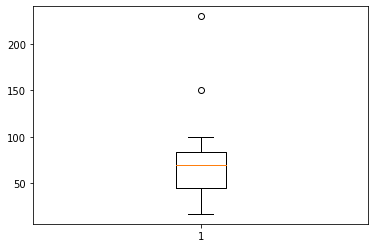

In [44]:
#1.
a.sort()
print(a)

if len(a) % 2 != 0:
    print('медиана =', a[round(len(a)/2)])
    print('первый квартиль =', a[round(len(a)/4)])
    print('третий квартиль =', a[3*round(len(a)/4)])
else:
    print('медиана =', (a[len(a)//2] + a[(len(a)//2) - 1])/2)
    
    
#2.
#интерквартильный размах
iqr = a[3*round(len(a)/4)] - a[round(len(a)/4)]

for i in a:
    if a[round(len(a)/2)] + 1.5*iqr > i > a[round(len(a)/2)] - 1.5*iqr:
        pass
    else:
        print('Выброс', i)


import matplotlib.pyplot as plt

plt.boxplot(a)
plt.show()

Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Если убрать вероятности сдать из условия задачи и предположить, что все сдают первую сессию или вероятность сдать на всех факультетах одинаковая, то вероятность учится сдавшего экзамен на А = 1/4, В = 1/4, C = 1/2. 

In [18]:
def bayes(a, b) -> float:
    return a*b/(a*b + (1-a)*(1-b))

print(bayes(0.8, 0.25))
print(bayes(0.7, 0.25))
print(bayes(0.9, 0.5))
print(bayes(0.25, 0.8) + bayes(0.25, 0.7))

0.5714285714285715
0.43749999999999994
0.9
1.0089285714285714
